In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Análise dos Dados

As análises a seguir foram realizadas a partir da execução do simulador **15 vezes**.

O simulador foi configurado com **4 transmissores**, cada um responsável por enviar **5 pacotes**.

Os resultados obtidos incluem métricas relacionadas a:

- **Tempo total de simulação**
- **Tempo de canal ocupado**
- **Tempo ocioso do canal**
- **Número total de colisões**
- **Colisões por transmissor**
- **Desempenho de utilização do canal**

Abaixo, são apresentados gráficos e tabelas com as principais observações dessas execuções.


In [38]:
dados = pd.read_excel('Testes_realizados.xlsx')

In [39]:
dados.desempenho_de_transmissao = dados.desempenho_de_transmissao * 100

## Análise de Desempenho

|                         | Tempo total da simulação | Tempo de transmissão no canal | Tempo de canal ocioso | Desempenho do canal |
|-------------------------|--------------------------|-------------------------------|-----------------------|---------------------|
| **Pior caso**           | 103.04s                  | 17.16s                        | 80.9s                 | 21.79%              |
| **Melhor caso**         | 23.62s                   | 22.14s                        | 2.69s                 | 88.73%              |
| **Média**               | 41.51s                   | 19.55s                        | 21.90s                | 57.50%              |


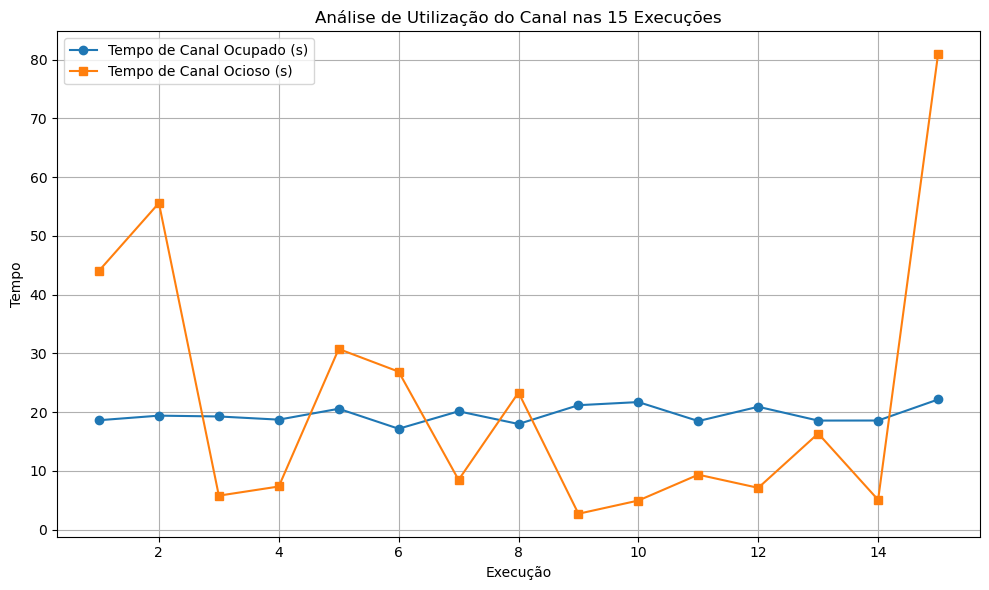

In [40]:
x = range(1, len(dados) + 1)  # Número das execuções

plt.figure(figsize=(10, 6))

# Plotar Tempo de Canal Ocupado
plt.plot(x, dados['tempo_total_transmissao'], marker='o', label='Tempo de Canal Ocupado (s)')

# Plotar Tempo de Canal Ocioso
plt.plot(x, dados['tempo_ocioso'], marker='s', label='Tempo de Canal Ocioso (s)')

# Configurações finais do gráfico
plt.title('Análise de Utilização do Canal nas 15 Execuções')
plt.xlabel('Execução')
plt.ylabel('Tempo')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

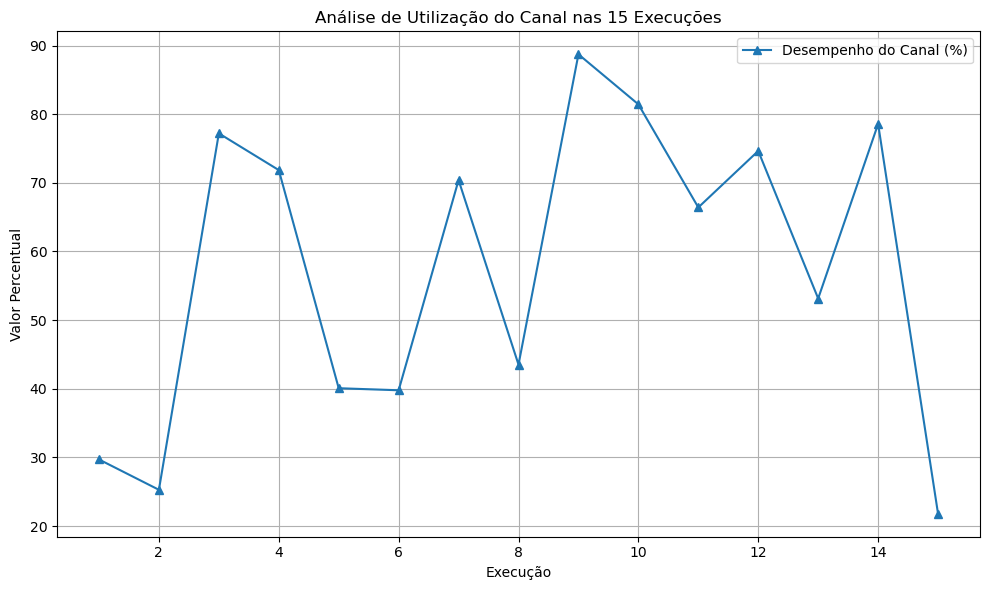

In [41]:
x = range(1, len(dados) + 1)  # Número das execuções

plt.figure(figsize=(10, 6))

# Corrigir o desempenho: remover '%' e converter para float (mantendo os valores como 21.79, 43.52, etc)
dados['desempenho_de_transmissao'] = dados['desempenho_de_transmissao'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Plotar Desempenho do Canal
plt.plot(x, dados['desempenho_de_transmissao'], marker='^', label='Desempenho do Canal (%)')

# Configurações finais do gráfico
plt.title('Análise de Utilização do Canal nas 15 Execuções')
plt.xlabel('Execução')
plt.ylabel('Valor Percentual')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Análise de Colisões

|                         | Número de Colisões |
|-------------------------|--------------------|
| **Pior caso**           | 13                 |
| **Melhor caso**         | 0                  |
| **Média**               | 4.8                |


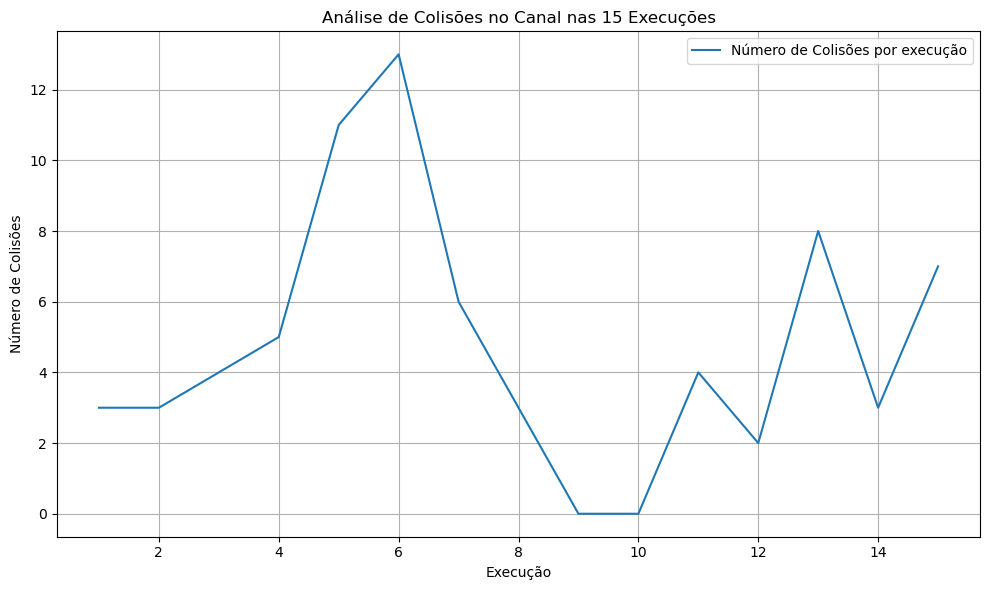

In [42]:
x = range(1, len(dados) + 1)  # Número das execuções

plt.figure(figsize=(10, 6))

# Plotar Número de colisões
plt.plot(x, dados['total_colisoes'],  label='Número de Colisões por execução')

# Configurações finais do gráfico
plt.title('Análise de Colisões no Canal nas 15 Execuções')
plt.xlabel('Execução')
plt.ylabel('Número de Colisões')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Análise de tentativas de envio

|                         | Número de Tentativas de Envio |
|-------------------------|-------------------------------|
| **Pior caso**           | 132                           |
| **Melhor caso**         | 79                            |
| **Média**               | 107.6                         |


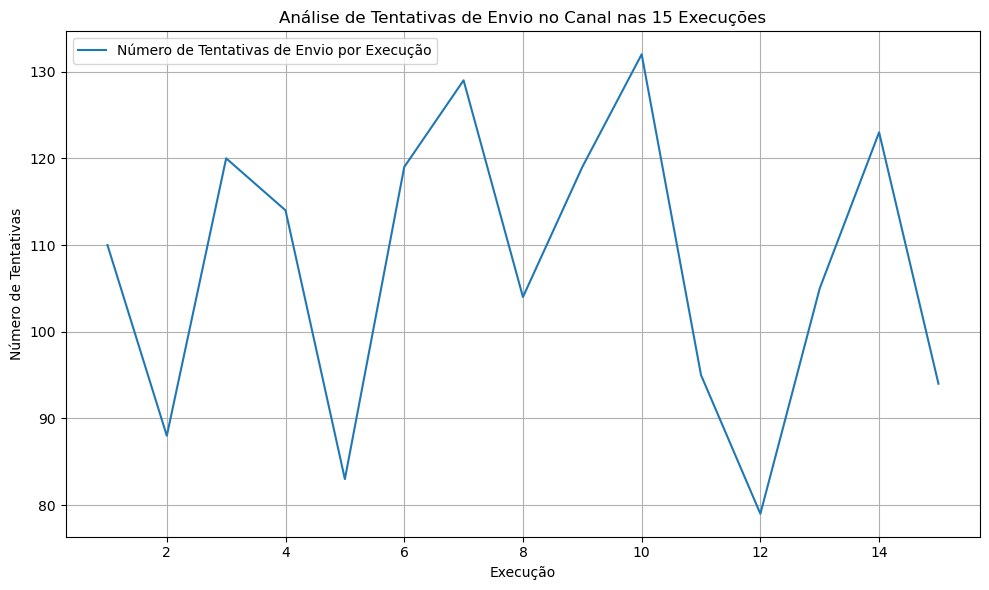

In [43]:
x = range(1, len(dados) + 1)  # Número das execuções

plt.figure(figsize=(10, 6))

# Plotar Número de colisões
plt.plot(x, dados['numero_total_tentativas_por_execucao'],  label='Número de Tentativas de Envio por Execução')

# Configurações finais do gráfico
plt.title('Análise de Tentativas de Envio no Canal nas 15 Execuções')
plt.xlabel('Execução')
plt.ylabel('Número de Tentativas')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
